In [3]:
#import all libraries needed 
import os
import pandas as pd

from api_keys import gkey
import gmaps
import gmaps.datasets
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

In [4]:
#Get Path to get to the Datasets
firepath = os.path.join('Data Sets', 'California_Fire_Incidents.csv')
singlepath = os.path.join('Data Sets','City_zhvi_single_family.csv')

#read the files 
fire = pd.read_csv(firepath)
singlecity = pd.read_csv(singlepath)

In [5]:
singlecity.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,209351.0,208772.0,...,672936.0,672209.0,671450.0,671253.0,671526.0,671719.0,671601.0,672261.0,672389.0,673213.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,193916.0,193960.0,...,759513.0,763224.0,766002.0,770182.0,774078.0,780205.0,785793.0,789989.0,790037.0,788920.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,95454.0,95554.0,...,192561.0,193168.0,193616.0,194133.0,194270.0,194724.0,195586.0,196630.0,197445.0,197941.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,127917.0,127789.0,...,228316.0,228191.0,228145.0,228217.0,228561.0,229004.0,229648.0,230000.0,230383.0,230957.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,94992.0,94958.0,...,186918.0,187543.0,188271.0,188410.0,188913.0,189028.0,189564.0,189684.0,189929.0,190068.0


In [6]:
#usinging only the cities in California
SingleCCal = singlecity.loc[singlecity['StateName'] =='CA']
SingleCCal

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,193916.0,193960.0,...,759513.0,763224.0,766002.0,770182.0,774078.0,780205.0,785793.0,789989.0,790037.0,788920.0
8,54296,8,San Diego,City,CA,CA,San Diego-Carlsbad,San Diego County,216701.0,216342.0,...,725853.0,727571.0,730853.0,734733.0,740112.0,744208.0,748744.0,751096.0,753893.0,754223.0
11,33839,11,San Jose,City,CA,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,218822.0,218222.0,...,1020573.0,1024151.0,1027883.0,1034380.0,1046264.0,1057397.0,1068942.0,1074703.0,1080058.0,1088749.0
14,20330,14,San Francisco,City,CA,CA,San Francisco-Oakland-Hayward,San Francisco County,305212.0,304198.0,...,1505519.0,1511407.0,1519514.0,1531203.0,1535710.0,1539101.0,1535882.0,1533941.0,1523778.0,1511653.0
30,20288,30,Sacramento,City,CA,CA,Sacramento--Roseville--Arden-Arcade,Sacramento County,109287.0,108768.0,...,350842.0,353592.0,356618.0,358601.0,360857.0,362724.0,365194.0,366583.0,366772.0,366198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26401,29195,29449,Lockwood,City,CA,CA,Salinas,Monterey County,NaN,NaN,...,610914.0,613382.0,613047.0,613266.0,611159.0,610241.0,611718.0,615934.0,623633.0,631555.0
26406,36339,29449,Tecopa,City,CA,CA,NaN,Inyo County,NaN,NaN,...,34627.0,34688.0,34687.0,34614.0,34465.0,34328.0,34042.0,33631.0,33159.0,32578.0
26435,17380,29449,Challenge,City,CA,CA,Yuba City,Yuba County,NaN,NaN,...,211217.0,213588.0,215080.0,215313.0,215703.0,214733.0,212881.0,211004.0,208809.0,205041.0
26466,21913,29449,Honeydew,City,CA,CA,Eureka-Arcata-Fortuna,Humboldt County,NaN,NaN,...,672166.0,680526.0,688958.0,698685.0,707643.0,720505.0,733777.0,749997.0,767960.0,792172.0


In [7]:
clsinglecity = SingleCCal[["RegionName","RegionType",'2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30']] 

clsinglecity

,RegionName,RegionType,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
1,Los Angeles,City,456335.0,465418.0,474624.0,485901.0,495073.0,504116.0,513214.0,524903.0,...,759513.0,763224.0,766002.0,770182.0,774078.0,780205.0,785793.0,789989.0,790037.0,788920.0
8,San Diego,City,480412.0,486390.0,493743.0,503126.0,512648.0,521629.0,531195.0,541399.0,...,725853.0,727571.0,730853.0,734733.0,740112.0,744208.0,748744.0,751096.0,753893.0,754223.0
11,San Jose,City,599714.0,607840.0,616733.0,625250.0,637317.0,648566.0,656199.0,661626.0,...,1020573.0,1024151.0,1027883.0,1034380.0,1046264.0,1057397.0,1068942.0,1074703.0,1080058.0,1088749.0
14,San Francisco,City,841667.0,848388.0,856907.0,865447.0,886218.0,907912.0,922165.0,935819.0,...,1505519.0,1511407.0,1519514.0,1531203.0,1535710.0,1539101.0,1535882.0,1533941.0,1523778.0,1511653.0
30,Sacramento,City,177728.0,182062.0,186842.0,192144.0,198859.0,205846.0,213466.0,218441.0,...,350842.0,353592.0,356618.0,358601.0,360857.0,362724.0,365194.0,366583.0,366772.0,366198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26401,Lockwood,City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,610914.0,613382.0,613047.0,613266.0,611159.0,610241.0,611718.0,615934.0,623633.0,631555.0
26406,Tecopa,City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34627.0,34688.0,34687.0,34614.0,34465.0,34328.0,34042.0,33631.0,33159.0,32578.0
26435,Challenge,City,130369.0,132133.0,133861.0,134329.0,134690.0,135900.0,138400.0,141567.0,...,211217.0,213588.0,215080.0,215313.0,215703.0,214733.0,212881.0,211004.0,208809.0,205041.0
26466,Honeydew,City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,672166.0,680526.0,688958.0,698685.0,707643.0,720505.0,733777.0,749997.0,767960.0,792172.0


In [8]:
# Remove the rows with missing data
cleanSingleCCal = clsinglecity.dropna(how="any")
cleanSingleCCal.count()

RegionName    1035
RegionType    1035
2013-01-31    1035
2013-02-28    1035
2013-03-31    1035
              ... 
2020-02-29    1035
2020-03-31    1035
2020-04-30    1035
2020-05-31    1035
2020-06-30    1035
Length: 92, dtype: int64

In [9]:
cleanSingleCCal.dtypes

RegionName     object
RegionType     object
2013-01-31    float64
2013-02-28    float64
2013-03-31    float64
               ...   
2020-02-29    float64
2020-03-31    float64
2020-04-30    float64
2020-05-31    float64
2020-06-30    float64
Length: 92, dtype: object

In [10]:
cleanSingleCCal

,RegionName,RegionType,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
1,Los Angeles,City,456335.0,465418.0,474624.0,485901.0,495073.0,504116.0,513214.0,524903.0,...,759513.0,763224.0,766002.0,770182.0,774078.0,780205.0,785793.0,789989.0,790037.0,788920.0
8,San Diego,City,480412.0,486390.0,493743.0,503126.0,512648.0,521629.0,531195.0,541399.0,...,725853.0,727571.0,730853.0,734733.0,740112.0,744208.0,748744.0,751096.0,753893.0,754223.0
11,San Jose,City,599714.0,607840.0,616733.0,625250.0,637317.0,648566.0,656199.0,661626.0,...,1020573.0,1024151.0,1027883.0,1034380.0,1046264.0,1057397.0,1068942.0,1074703.0,1080058.0,1088749.0
14,San Francisco,City,841667.0,848388.0,856907.0,865447.0,886218.0,907912.0,922165.0,935819.0,...,1505519.0,1511407.0,1519514.0,1531203.0,1535710.0,1539101.0,1535882.0,1533941.0,1523778.0,1511653.0
30,Sacramento,City,177728.0,182062.0,186842.0,192144.0,198859.0,205846.0,213466.0,218441.0,...,350842.0,353592.0,356618.0,358601.0,360857.0,362724.0,365194.0,366583.0,366772.0,366198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26198,McCloud,City,158565.0,159627.0,161082.0,163267.0,165625.0,168000.0,170202.0,172811.0,...,223926.0,224326.0,224779.0,224773.0,224615.0,224075.0,223584.0,223098.0,222318.0,221061.0
26236,Mount Baldy,City,402242.0,409018.0,414845.0,420794.0,428996.0,436673.0,446427.0,456722.0,...,591631.0,590378.0,584817.0,577607.0,572933.0,576988.0,580926.0,584980.0,579580.0,574132.0
26292,North Palm Springs,City,126719.0,129111.0,131916.0,135111.0,138045.0,139126.0,140032.0,139771.0,...,250694.0,252883.0,254807.0,256575.0,256933.0,257057.0,258188.0,258854.0,259558.0,258280.0
26305,Fields Landing,City,210453.0,216270.0,222354.0,226840.0,230513.0,233703.0,235822.0,235264.0,...,277187.0,279644.0,280930.0,280717.0,278815.0,277085.0,275763.0,276381.0,277400.0,277990.0


In [11]:
# cleanSingleCCal["Average Home Price"] = "Average Home Price"
# cleanSingleCCal

In [12]:
cleanSingleCCal["RegionType"].unique()


array(['City'], dtype=object)

In [13]:
# Set the 'RegionName' to be our index for easy referencing of rows
cleanSingleCCal = cleanSingleCCal.set_index("RegionType")
cleanSingleCCal

,RegionName,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
RegionType,,,,,,,,,,,,,,,,,,,,,
City,Los Angeles,456335.0,465418.0,474624.0,485901.0,495073.0,504116.0,513214.0,524903.0,534948.0,...,759513.0,763224.0,766002.0,770182.0,774078.0,780205.0,785793.0,789989.0,790037.0,788920.0
City,San Diego,480412.0,486390.0,493743.0,503126.0,512648.0,521629.0,531195.0,541399.0,546986.0,...,725853.0,727571.0,730853.0,734733.0,740112.0,744208.0,748744.0,751096.0,753893.0,754223.0
City,San Jose,599714.0,607840.0,616733.0,625250.0,637317.0,648566.0,656199.0,661626.0,665321.0,...,1020573.0,1024151.0,1027883.0,1034380.0,1046264.0,1057397.0,1068942.0,1074703.0,1080058.0,1088749.0
City,San Francisco,841667.0,848388.0,856907.0,865447.0,886218.0,907912.0,922165.0,935819.0,942248.0,...,1505519.0,1511407.0,1519514.0,1531203.0,1535710.0,1539101.0,1535882.0,1533941.0,1523778.0,1511653.0
City,Sacramento,177728.0,182062.0,186842.0,192144.0,198859.0,205846.0,213466.0,218441.0,222871.0,...,350842.0,353592.0,356618.0,358601.0,360857.0,362724.0,365194.0,366583.0,366772.0,366198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City,McCloud,158565.0,159627.0,161082.0,163267.0,165625.0,168000.0,170202.0,172811.0,175419.0,...,223926.0,224326.0,224779.0,224773.0,224615.0,224075.0,223584.0,223098.0,222318.0,221061.0
City,Mount Baldy,402242.0,409018.0,414845.0,420794.0,428996.0,436673.0,446427.0,456722.0,467937.0,...,591631.0,590378.0,584817.0,577607.0,572933.0,576988.0,580926.0,584980.0,579580.0,574132.0
City,North Palm Springs,126719.0,129111.0,131916.0,135111.0,138045.0,139126.0,140032.0,139771.0,140872.0,...,250694.0,252883.0,254807.0,256575.0,256933.0,257057.0,258188.0,258854.0,259558.0,258280.0


In [14]:
# Collect the mean house price rates for the data
cleanSingleCCal = cleanSingleCCal.mean()

# Collect the years where data was collected
years = cleanSingleCCal.keys()


In [15]:
type(cleanSingleCCal)

pandas.core.series.Series

In [16]:
cleanSingleCCal

2013-01-31    374996.330435
2013-02-28    380639.481159
2013-03-31    386819.770048
2013-04-30    393383.725604
2013-05-31    399978.006763
                  ...      
2020-02-29    621306.332367
2020-03-31    623971.020290
2020-04-30    625360.855072
2020-05-31    625041.793237
2020-06-30    624725.666667
Length: 90, dtype: float64

In [17]:
MeanAve = cleanSingleCCal.values

In [18]:
years.tolist()

['2013-01-31',
 '2013-02-28',
 '2013-03-31',
 '2013-04-30',
 '2013-05-31',
 '2013-06-30',
 '2013-07-31',
 '2013-08-31',
 '2013-09-30',
 '2013-10-31',
 '2013-11-30',
 '2013-12-31',
 '2014-01-31',
 '2014-02-28',
 '2014-03-31',
 '2014-04-30',
 '2014-05-31',
 '2014-06-30',
 '2014-07-31',
 '2014-08-31',
 '2014-09-30',
 '2014-10-31',
 '2014-11-30',
 '2014-12-31',
 '2015-01-31',
 '2015-02-28',
 '2015-03-31',
 '2015-04-30',
 '2015-05-31',
 '2015-06-30',
 '2015-07-31',
 '2015-08-31',
 '2015-09-30',
 '2015-10-31',
 '2015-11-30',
 '2015-12-31',
 '2016-01-31',
 '2016-02-29',
 '2016-03-31',
 '2016-04-30',
 '2016-05-31',
 '2016-06-30',
 '2016-07-31',
 '2016-08-31',
 '2016-09-30',
 '2016-10-31',
 '2016-11-30',
 '2016-12-31',
 '2017-01-31',
 '2017-02-28',
 '2017-03-31',
 '2017-04-30',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',
 '2017-09-30',
 '2017-10-31',
 '2017-11-30',
 '2017-12-31',
 '2018-01-31',
 '2018-02-28',
 '2018-03-31',
 '2018-04-30',
 '2018-05-31',
 '2018-06-30',
 '2018-07-

In [19]:
type(years)

pandas.core.indexes.base.Index

In [20]:
GaryDate=[]
for each in years:
    date = each.split('-')[0]
    print(date)
    date = pd.to_numeric(date)
    print(date.dtype)
    GaryDate.append(date)


2013
int64
2013
int64
2013
int64
2013
int64
2013
int64
2013
int64
2013
int64
2013
int64
2013
int64
2013
int64
2013
int64
2013
int64
2014
int64
2014
int64
2014
int64
2014
int64
2014
int64
2014
int64
2014
int64
2014
int64
2014
int64
2014
int64
2014
int64
2014
int64
2015
int64
2015
int64
2015
int64
2015
int64
2015
int64
2015
int64
2015
int64
2015
int64
2015
int64
2015
int64
2015
int64
2015
int64
2016
int64
2016
int64
2016
int64
2016
int64
2016
int64
2016
int64
2016
int64
2016
int64
2016
int64
2016
int64
2016
int64
2016
int64
2017
int64
2017
int64
2017
int64
2017
int64
2017
int64
2017
int64
2017
int64
2017
int64
2017
int64
2017
int64
2017
int64
2017
int64
2018
int64
2018
int64
2018
int64
2018
int64
2018
int64
2018
int64
2018
int64
2018
int64
2018
int64
2018
int64
2018
int64
2018
int64
2019
int64
2019
int64
2019
int64
2019
int64
2019
int64
2019
int64
2019
int64
2019
int64
2019
int64
2019
int64
2019
int64
2019
int64
2020
int64
2020
int64
2020
int64
2020
int64
2020
int64
2020
int64


In [21]:
print(GaryDate)

[2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020]


In [22]:
x = np.array(GaryDate)
x

array([2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020,
       2020, 2020])

In [23]:
type(x)

numpy.ndarray

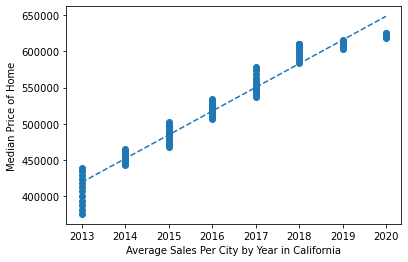

In [24]:


# Plot the house values for california
# Cal_Housing = 
plt.scatter(x,MeanAve)
plt.xlabel('Average Sales Per City by Year in California')
plt.ylabel('Median Price of Home')
# Create a legend for our chart
# plt.legend(handles=[Cal_Housing], loc="best")
# Perform a linear regression on year versus house value rate
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(x,MeanAve)
# Create equation of line to calculate predicted house value rate
vc_fit = vc_slope * x + vc_int
plt.plot(x,vc_fit,"--")
# Show the chart
plt.savefig("median_year_CA.png")
plt.show()

In [25]:
# Calculate the correlation coefficient between median prices and average sales by years
print(f"The correlation coefficient between median prices and average sales per year is {round(st.pearsonr(x,MeanAve)[0],2)}")

The correlation coefficient between median prices and average sales per year is 0.98
